TASK-1 Titanic Dataset

In [ ]:
import pandas as pd
from google.colab import files
import io

In [ ]:
titanic_data = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
filename = next(iter(titanic_data))

In [ ]:
titanic_data = pd.read_csv(io.BytesIO(titanic_data[filename]))

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Preparing Model for Training

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace = True)

In [ ]:
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
if 'Embarked' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], prefix='Embarked')
else:
    print("Warning: 'Embarked' column not found in DataFrame. Skipping dummy creation.")

In [ ]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500       False       False        True  
1      0          PC 17599  71.2833        True       False       False  
2      0  STON/O2. 3101282   7.9250       False       False        True  
3      0            1138

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [ ]:
titanic_data['IsAlone'] = 1
titanic_data['IsAlone'].loc[titanic_data['FamilySize'] > 1] = 0

<ipython-input-22-e6e28bbd202c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['IsAlone'].loc[titanic_data['FamilySize'] > 1] = 0


In [ ]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,False,False,True,2,0
1,1,1,female,38.0,1,0,71.2833,True,False,False,2,0
2,1,3,female,26.0,0,0,7.9250,False,False,True,1,1
3,1,1,female,35.0,1,0,53.1000,False,False,True,2,0
4,0,3,male,35.0,0,0,8.0500,False,False,True,1,1


Training Model

In [ ]:
x = titanic_data.drop('Survived', axis=1)

In [ ]:
y = titanic_data['Survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state=2529)

In [ ]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((267, 11), (624, 11), (267,), (624,))

In [ ]:
x_train, x_test = x_test, x_train

In [ ]:
y_train, y_test =y_test ,y_train

In [ ]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((624, 11), (267, 11), (624,), (267,))

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
x_train['Sex'] = x_train['Sex'].astype(str)
x_test['Sex'] = x_test['Sex'].astype(str)

In [ ]:
all_sex_values = pd.concat([x_train['Sex'], x_test['Sex']]).unique()
label_encoder.fit(all_sex_values)

LabelEncoder()

In [ ]:
label_encoder.fit(x_train['Sex'])

LabelEncoder()

In [ ]:
x_train['Sex'] = label_encoder.fit_transform(x_train['Sex'])

In [ ]:
x_test['Sex'] = label_encoder.fit_transform(x_test['Sex'])

In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=1000)

Prediction

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[132  31]
 [ 32  72]]


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       163
           1       0.70      0.69      0.70       104

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



Model Evaluation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

Graphical Representation

<Axes: >

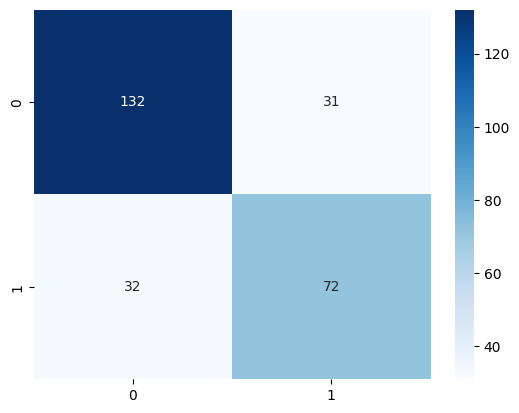

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')